In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import os
import gc
import random
import dask.dataframe as dd
import sys
import pickle
import timeit
sns.set()

In [3]:
pip install facets


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
pwd

'C:\\Users\\jenif\\Desktop\\WiDS_datathon'

In [5]:
train = pd.read_csv('C:\\Users\\jenif\\Desktop\\WiDS_datathon\\training_v2.csv')

# Look at Data Basics


In [6]:
train.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [7]:
train.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                              float64
bmi                              float64
elective_surgery                 int64
ethnicity                        object
gender                           object
height                           float64
hospital_admit_source            object
icu_admit_source                 object
icu_id                           int64
icu_stay_type                    object
icu_type                         object
pre_icu_los_days                 float64
readmission_status               int64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative            int64
arf_apache

In [9]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')

There are 175 columns in train dataset with missing values.


# Identifiers
Assesing balance counts of identifiers...


In [10]:
def count_unique(train, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(train[col].value_counts())

cat_cols = ['encounter_id', 'hospital_id', 'patient_id', 'icu_id']
count_unique(train, cat_cols)


For column encounter_id
2047      1
60040     1
117356    1
121454    1
76400     1
         ..
32037     1
25894     1
27943     1
5416      1
2049      1
Name: encounter_id, Length: 91713, dtype: int64

For column hospital_id
118    4333
19     3925
188    3095
161    2792
70     2754
       ... 
4         7
23        7
93        6
95        6
130       2
Name: hospital_id, Length: 147, dtype: int64

For column patient_id
8188     1
10960    1
66229    1
72374    1
92856    1
        ..
70984    1
73033    1
68939    1
79180    1
4098     1
Name: patient_id, Length: 91713, dtype: int64

For column icu_id
646    1325
653    1307
876    1284
413    1239
236    1140
       ... 
494       3
302       2
603       2
365       2
241       1
Name: icu_id, Length: 241, dtype: int64


It appears that each encounter is a different patient as there are the same number of encounters as patients.  There are 147 unique hospitals that range from 4333 of the encounters to 2 encounters.  Hospitals with low levels of encounters will have less reliable data.  Let's take a look at the distribution amongst hospital ID... 

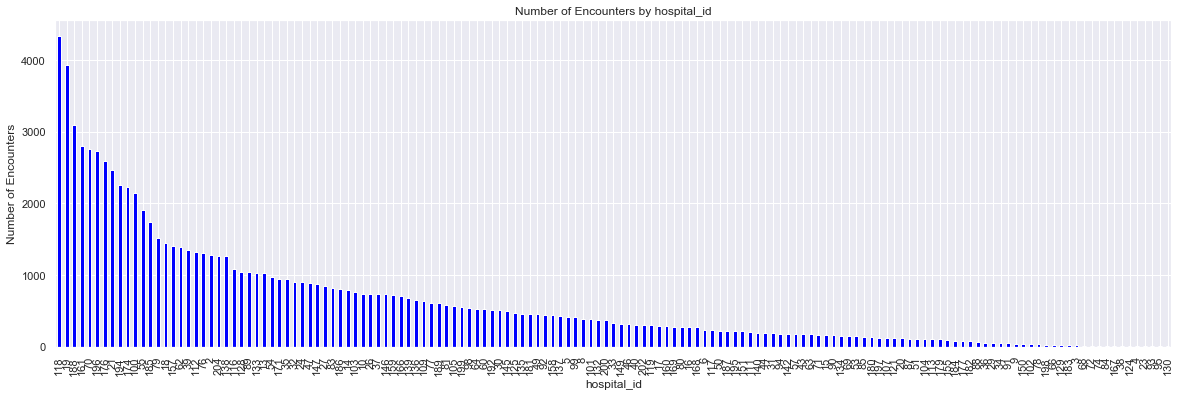

In [11]:
def plot_bars(train, cols):
    for col in cols:
        fig = plt.figure(figsize=(20,6)) #define plot area
        ax = fig.gca() #define axis
        counts = train[col].value_counts() #find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') #Use the plot.bar method on the counts data frame
        ax.set_title('Number of Encounters by ' + col) #Give the plot a main title
        ax.set_xlabel(col) #Set text for the x axis
        ax.set_ylabel('Number of Encounters') #Set text for y axis
        plt.show()
        
plot_cols = ['hospital_id']
plot_bars(train, plot_cols)

In [12]:
counts = train['hospital_id'].value_counts()
counts

118    4333
19     3925
188    3095
161    2792
70     2754
       ... 
4         7
23        7
93        6
95        6
130       2
Name: hospital_id, Length: 147, dtype: int64

In [13]:
counts[counts < 30]

198    29
66     22
129    19
183    17
3      16
68     15
72     15
74     13
84     12
167    10
38     10
124     9
4       7
23      7
93      6
95      6
130     2
Name: hospital_id, dtype: int64

So 11.56% of the hospitals have less than 30 encounters. (Seventeen/147.)

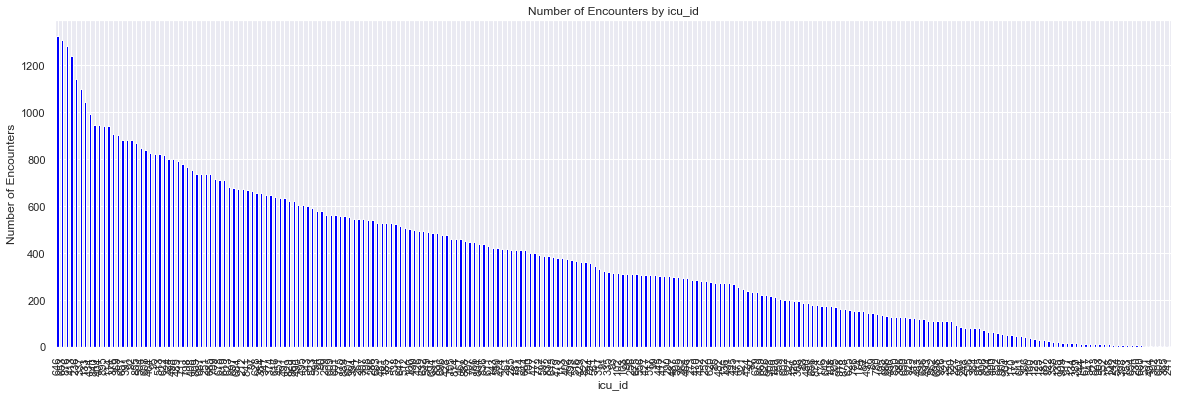

In [14]:
#Let's look at the same for icu_id
def plot_bars(train, cols):
    for col in cols:
        fig = plt.figure(figsize=(20,6)) #define plot area
        ax = fig.gca() #define axis
        counts = train[col].value_counts() #find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') #Use the plot.bar method on the counts data frame
        ax.set_title('Number of Encounters by ' + col) #Give the plot a main title
        ax.set_xlabel(col) #Set text for the x axis
        ax.set_ylabel('Number of Encounters') #Set text for y axis
        plt.show()
        
plot_cols = ['icu_id']
plot_bars(train, plot_cols)

In [15]:
counts_icu = train['icu_id'].value_counts()
counts_icu

646    1325
653    1307
876    1284
413    1239
236    1140
       ... 
494       3
302       2
603       2
365       2
241       1
Name: icu_id, Length: 241, dtype: int64

In [16]:
counts_icu[counts_icu < 30]

125    29
187    26
922    22
338    19
135    19
909    17
917    16
134    15
389    15
144    13
677    12
547    11
823    10
903    10
552     9
158     9
242     8
534     8
398     7
153     7
654     6
230     6
680     5
531     4
494     3
302     2
603     2
365     2
241     1
Name: icu_id, dtype: int64

12.03% of ICUs have less than 30 encounters.(29/241)


In [17]:
train.isnull().sum(axis=0)

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

In [18]:
#Dropping encounter_id and patient_id as they are identifiers and not a features
train.drop(['encounter_id', 'patient_id'], axis=1,inplace=True)
print(train.shape)
train.head()

(91713, 184)


,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,118,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,118,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,33,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


# Missing Data
There are a substantial number of features with a great deal of missing data.  There seems to be a cut off at about 50% missing data.  However it's possible that there are some features where the data being missing could be a predictor of hospital death.  Therefore, NAs of the features were examined against hospital_death separately in PowerBI to see if there were any features with missing data that actually may predict death.  (See WiDS Datathon Notes)  Most features showed a highter rate of life than death amongst the NAs.  There were a handful that a small opposite effect was seen:  h1_diasbp_invasive_max, h1_diasbp_invasive_min, h1_sysbp_invasive_max and min, h1mbp_invasive_max and min, as well as the urineoutput_apache. The remainder of the high missing value features are dropped from the database below.


In [19]:
#From visualization in Power BI on comparing the rates of Hospital death verses life in the NAs, I will drop the following features
train.drop(['h1_bilirubin_min', 'h1_lactate_max', 'h1_lactate_min','h1_albumin_max', 'h1_albumin_min',
            'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_hco3_max',
            'h1_hco3_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_wbc_max', 'h1_wbc_min', 'h1_arterial_po2_max',
            'h1_arterial_po2_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_bun_max',
            'h1_bun_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_hematocrit_max',
            'h1_hematocrit_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_sodium_max', 'h1_sodium_min', 'h1_potassium_max',
            'h1_potassium_min', 'fio2_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 
            'd1_lactate_max', 'd1_lactate_min', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_sysbp_invasive_max',
            'd1_sysbp_invasive_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min',
            'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min', 'd1_arterial_po2_max',
            'd1_arterial_po2_min', 'bilirubin_apache', 'd1_inr_max', 'd1_inr_min', 'h1_inr_max', 'h1_inr_min', 'albumin_apache',
            'd1_bilirubin_max', 'd1_bilirubin_min', 'h1_glucose_max', 'h1_glucose_min', 'd1_albumin_max', 'd1_albumin_min'], 
           axis=1,inplace=True)
print(train.shape)
train.head()

(91713, 118)


,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,118,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,118,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,33,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [20]:
train.dtypes

hospital_id                      int64
hospital_death                   int64
age                            float64
bmi                            float64
elective_surgery                 int64
                                ...   
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Length: 118, dtype: object

# Examine Classes and Class Imbalance
The label has significant class imbalance as the vast majority of ICU encounters thankfully have positive results.  The imbalance though, can bias the training of classifier algorithms leading to a higher error rate for the minority class.  Let's look at the class imbalance...


In [21]:
hospital_death_counts = train['hospital_death'].value_counts()
print(hospital_death_counts)


0    83798
1     7915
Name: hospital_death, dtype: int64


Only 8.63% of encounters in the dataset resulted in death.  This high imbalance will have to be addressed in the model.

# Visualizing Correlations


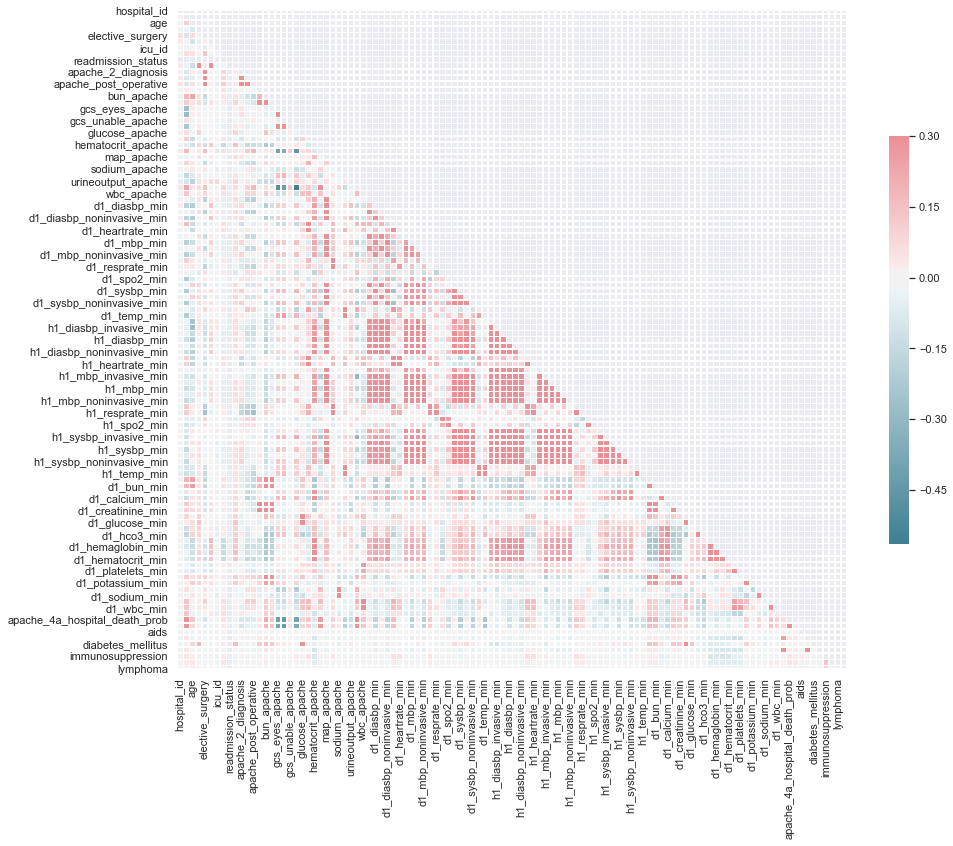

In [22]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

There's too many features to be able to read this, but by the range scale to the left, there is not a high correlation in either direction regardless. 

# Visualizing Class separation by Numeric Features
There are mainly numerical features in this dataset, though many are missing lots of data.  Let's look at the class separation by gruops of numberic features...


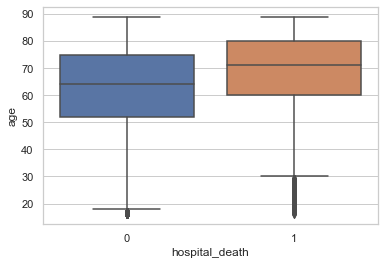

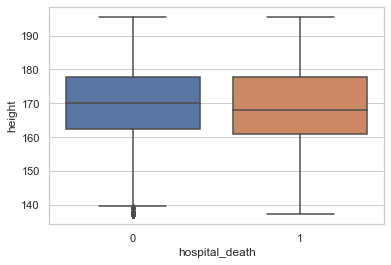

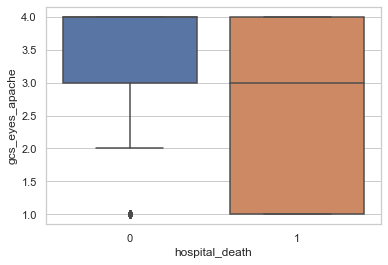

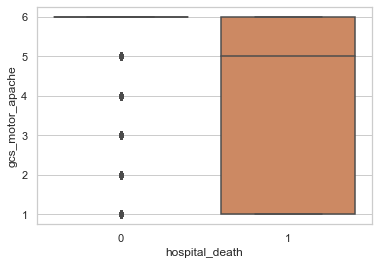

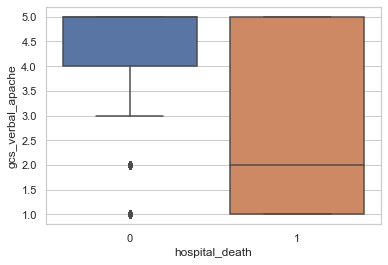

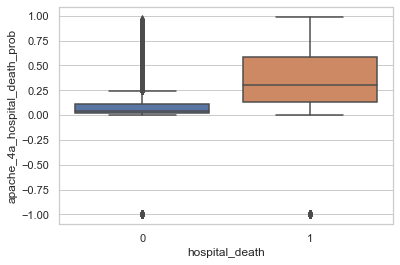

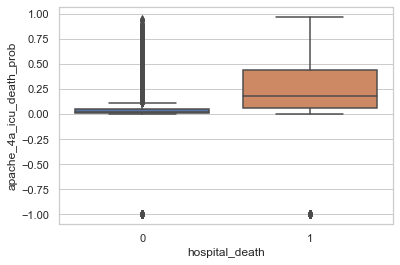

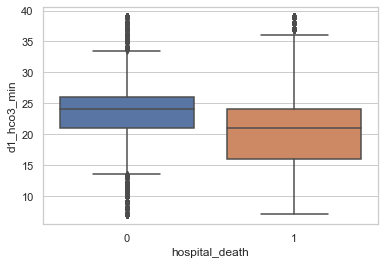

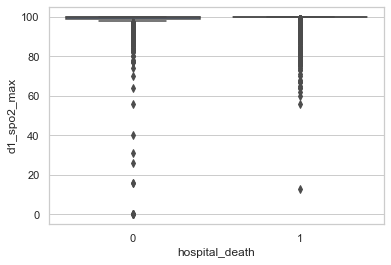

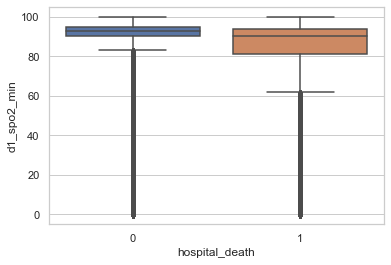

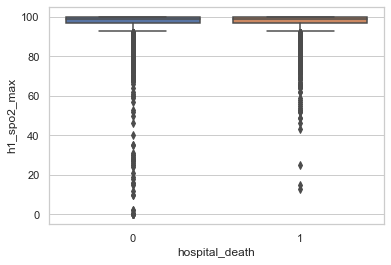

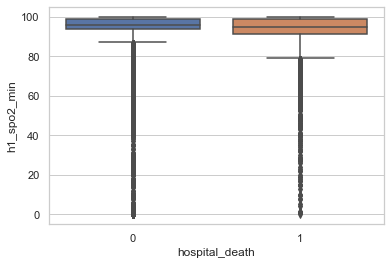

In [23]:
def plot_box(train, cols, col_x = 'hospital_death'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=train)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['age', 'height', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'apache_4a_hospital_death_prob', 
          'apache_4a_icu_death_prob', 'd1_hco3_min', 'd1_spo2_max', 'd1_spo2_min', 'h1_spo2_max', 'h1_spo2_min']
plot_box(train, num_cols)

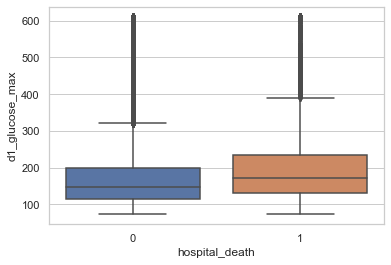

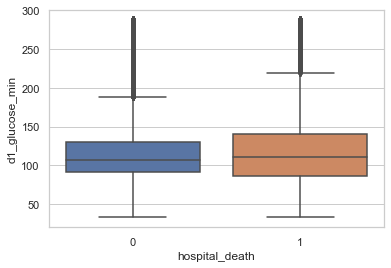

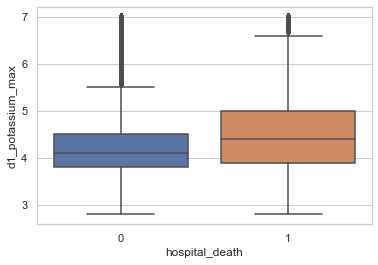

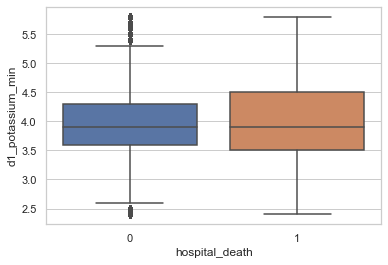

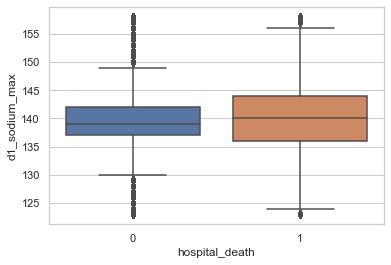

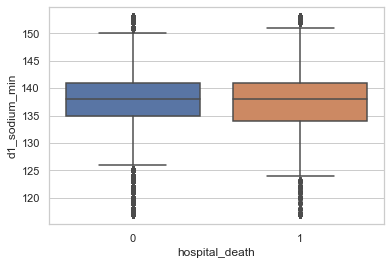

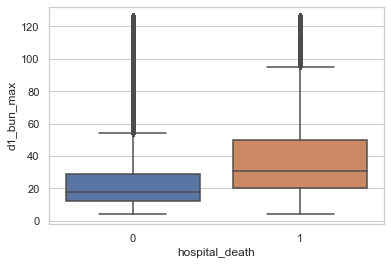

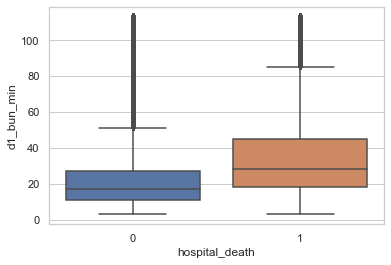

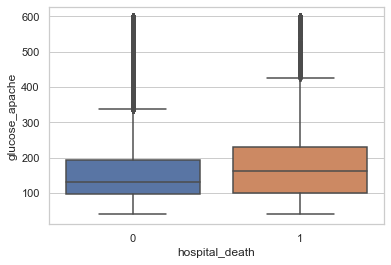

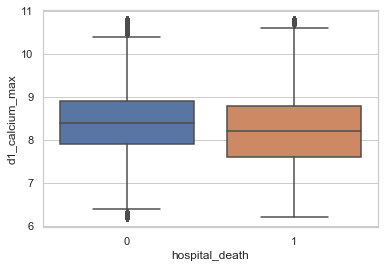

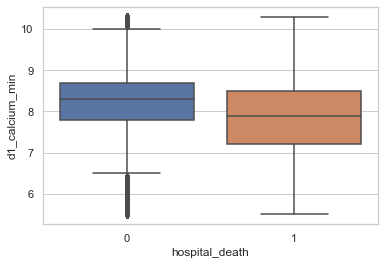

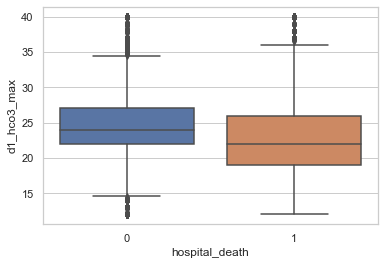

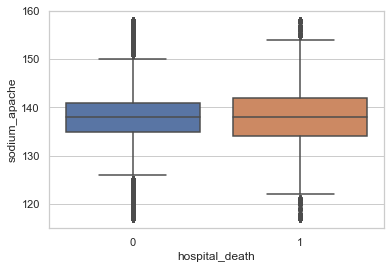

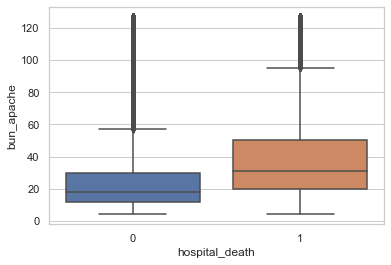

In [24]:
def plot_box(train, cols, col_x = 'hospital_death'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=train)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['d1_glucose_max', 'd1_glucose_min', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min',
            'd1_bun_max', 'd1_bun_min', 'glucose_apache', 'd1_calcium_max', 'd1_calcium_min', 'd1_hco3_max', 'sodium_apache',
            'bun_apache']
plot_box(train, num_cols)

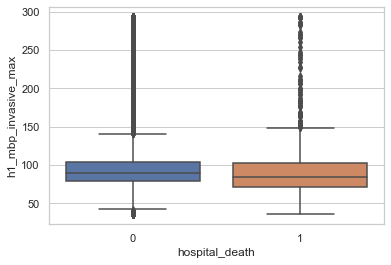

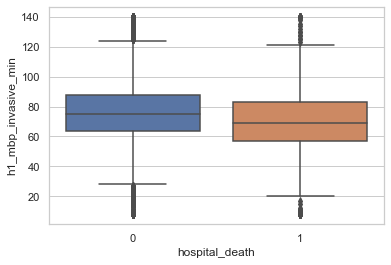

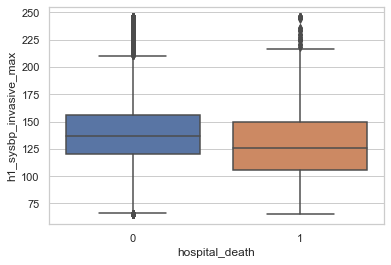

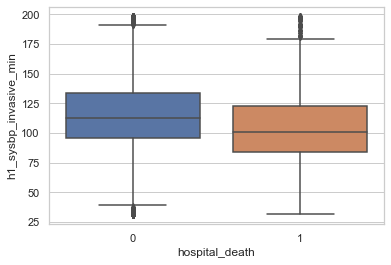

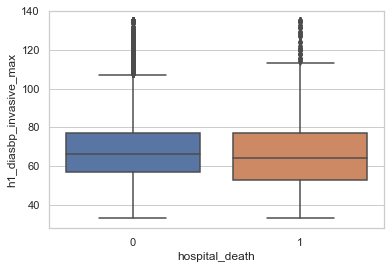

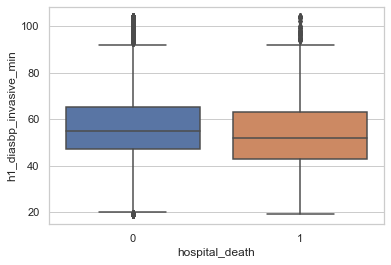

In [25]:
def plot_box(train, cols, col_x = 'hospital_death'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=train)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 
            'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min']
plot_box(train, num_cols)

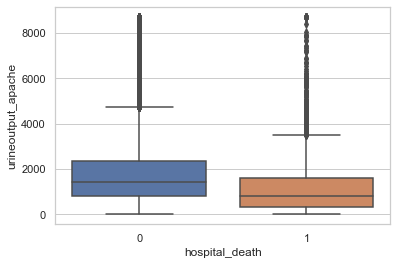

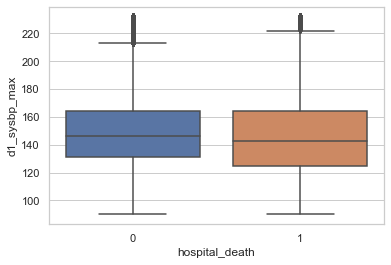

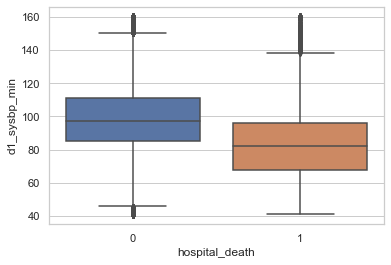

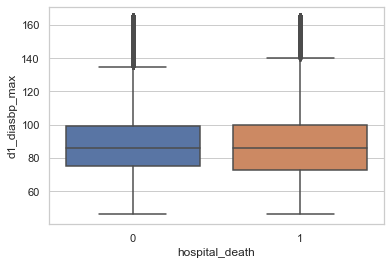

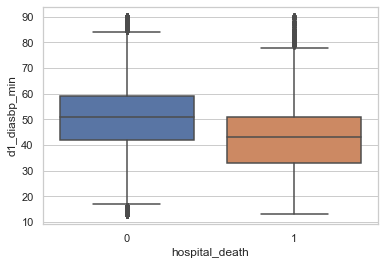

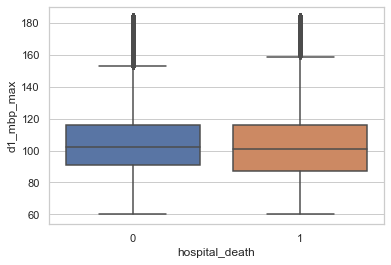

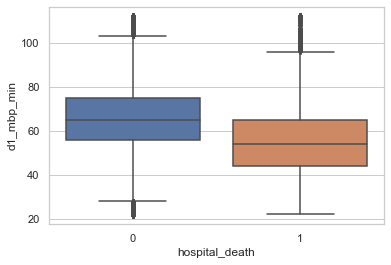

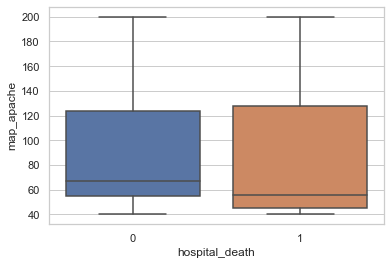

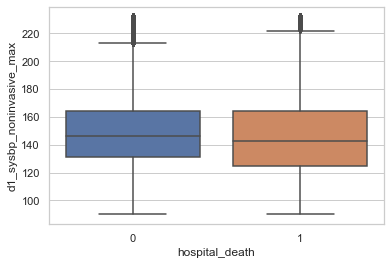

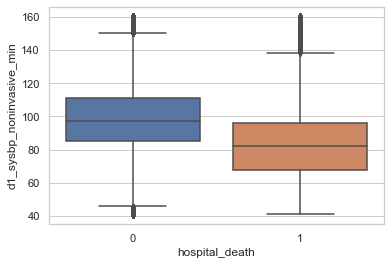

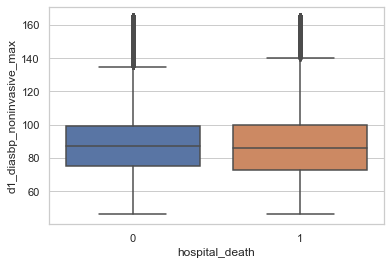

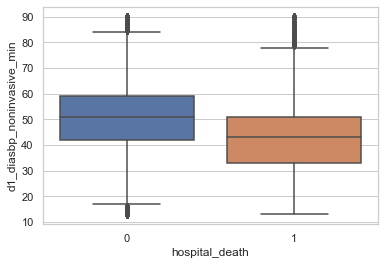

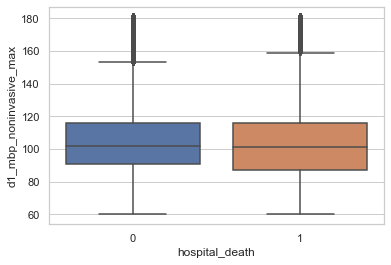

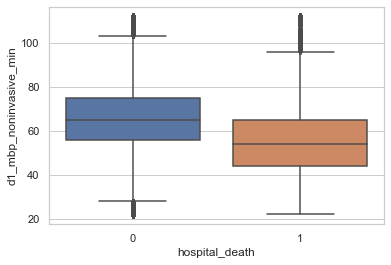

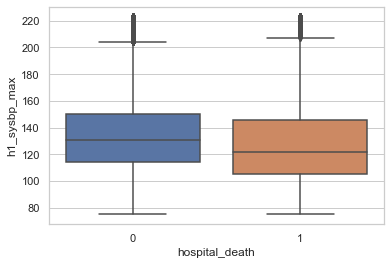

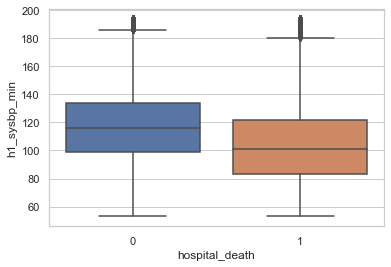

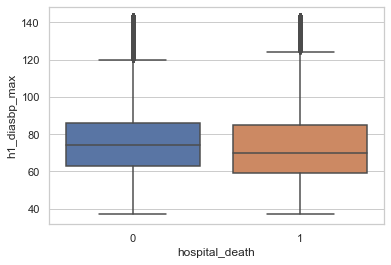

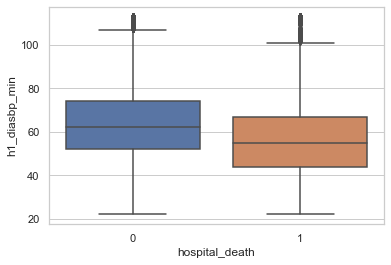

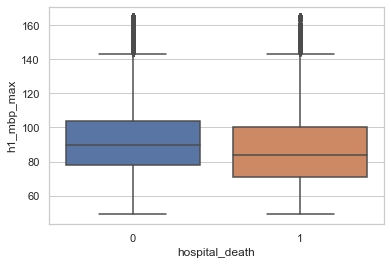

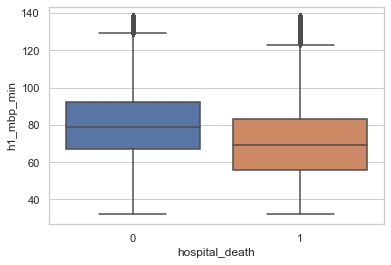

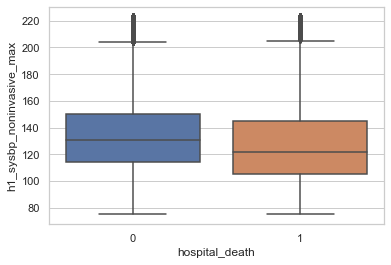

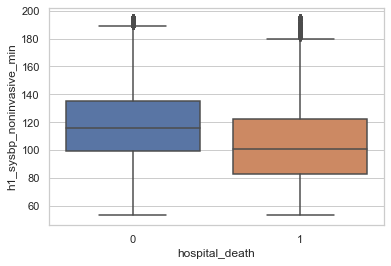

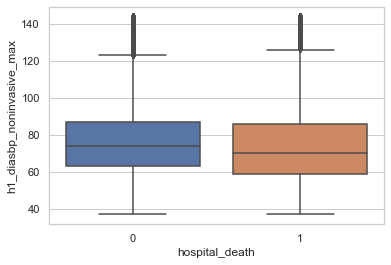

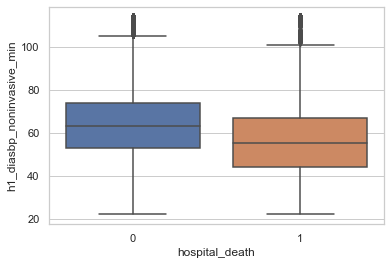

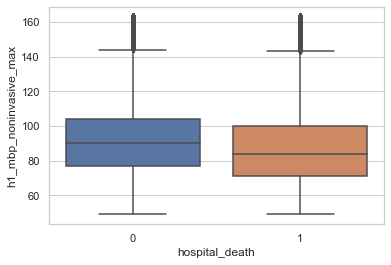

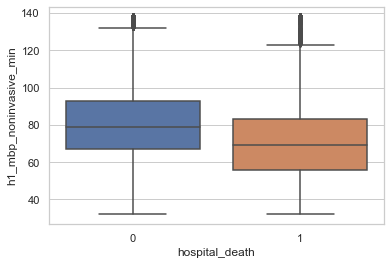

In [26]:
def plot_box(train, cols, col_x = 'hospital_death'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=train)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['urineoutput_apache','d1_sysbp_max', 'd1_sysbp_min', 'd1_diasbp_max', 'd1_diasbp_min','d1_mbp_max',
            'd1_mbp_min', 'map_apache', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_diasbp_noninvasive_max',
            'd1_diasbp_noninvasive_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'h1_sysbp_max', 'h1_sysbp_min', 
            'h1_diasbp_max', 'h1_diasbp_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
            'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min']
plot_box(train, num_cols)

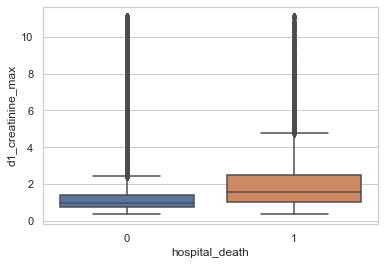

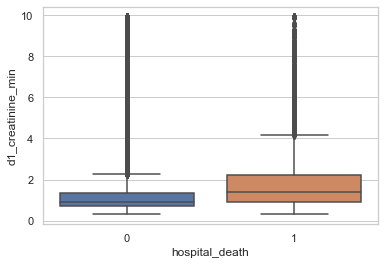

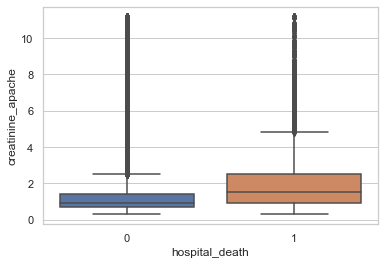

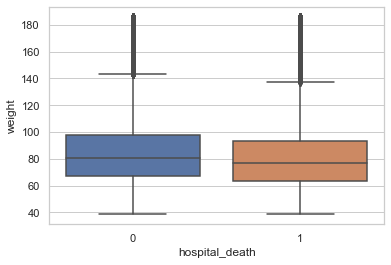

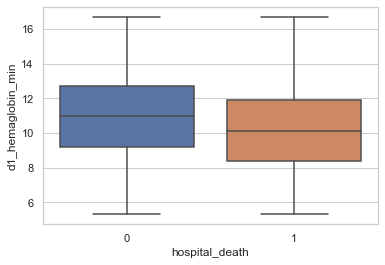

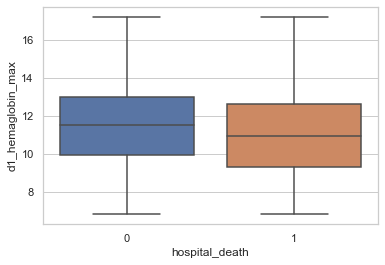

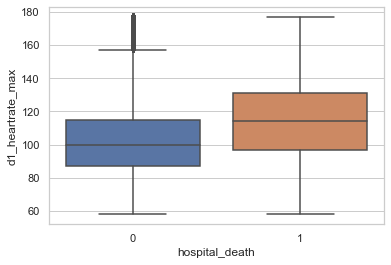

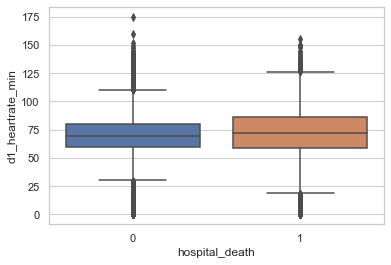

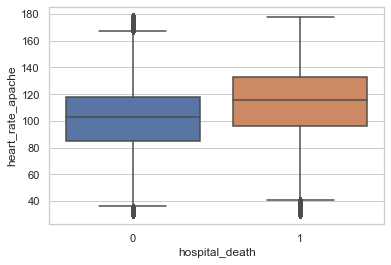

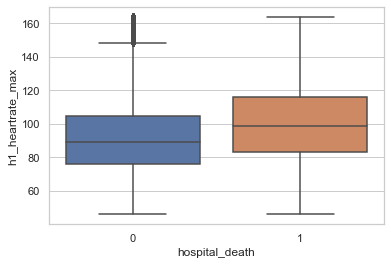

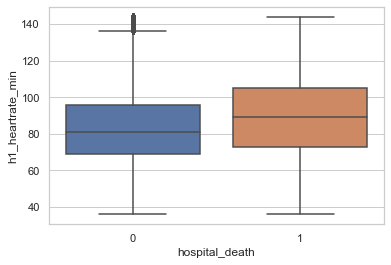

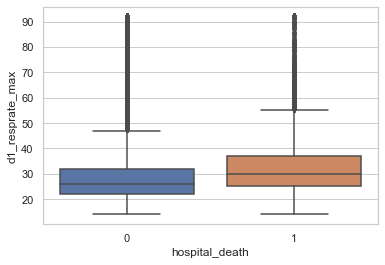

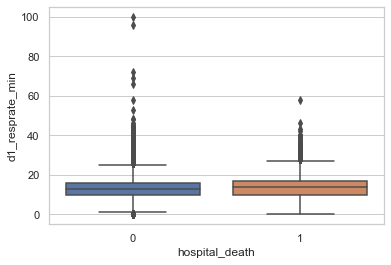

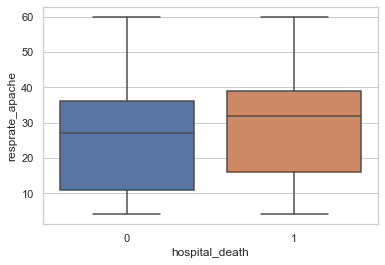

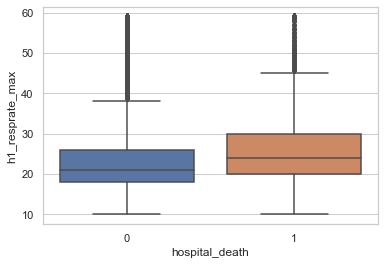

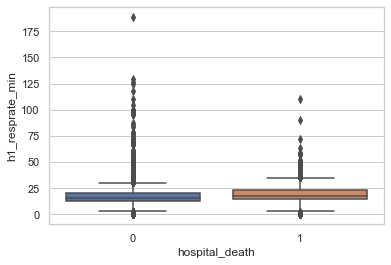

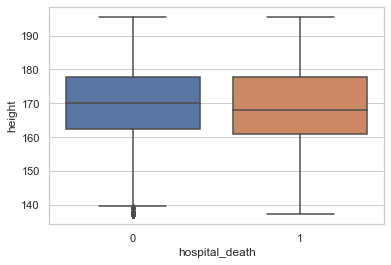

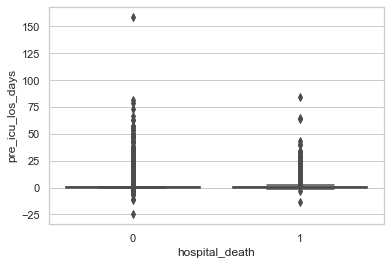

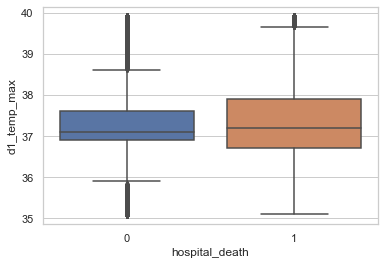

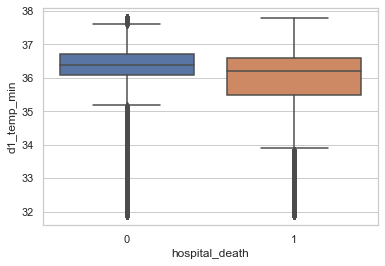

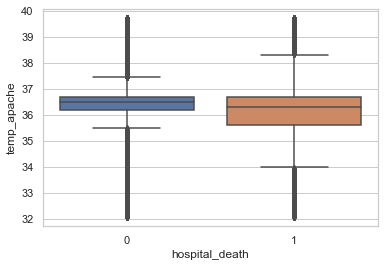

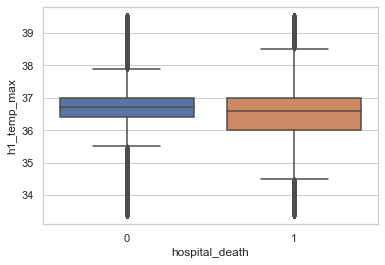

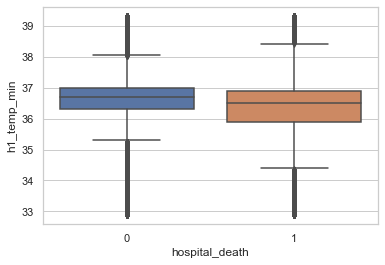

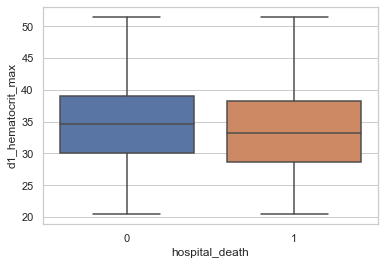

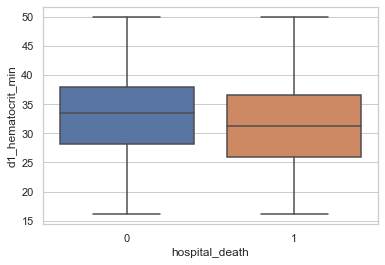

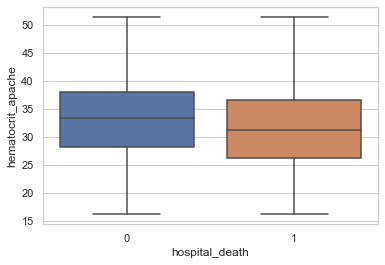

In [27]:
def plot_box(train, cols, col_x = 'hospital_death'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=train)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['d1_creatinine_max', 'd1_creatinine_min', 'creatinine_apache','weight', 'd1_hemaglobin_min', 'd1_hemaglobin_max',
            'd1_heartrate_max', 'd1_heartrate_min', 'heart_rate_apache', 'h1_heartrate_max', 'h1_heartrate_min', 
            'd1_resprate_max', 'd1_resprate_min', 'resprate_apache', 'h1_resprate_max', 'h1_resprate_min', 'height', 
            'pre_icu_los_days', 'd1_temp_max', 'd1_temp_min', 'temp_apache', 'h1_temp_max', 'h1_temp_min', 'd1_hematocrit_max',
            'd1_hematocrit_min', 'hematocrit_apache']
plot_box(train, num_cols)

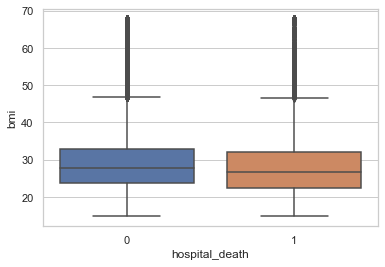

In [28]:
def plot_box(train, cols, col_x = 'hospital_death'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=train)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['bmi']
plot_box(train, num_cols)

From reviewing these, I will drop 20 more features...


In [29]:
train.drop(['d1_hco3_max','d1_resprate_min', 'h1_resprate_min', 'pre_icu_los_days','d1_sysbp_max', 'd1_diasbp_max',
            'd1_mbp_max', 'd1_diasbp_noninvasive_max', 'd1_mbp_noninvasive_max', 'h1_diasbp_max', 'h1_diasbp_noninvasive_max',
            'h1_mbp_invasive_max', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'd1_sodium_min', 'd1_calcium_max', 
            'sodium_apache', 'd1_spo2_max', 'h1_spo2_max'], 
           axis=1,inplace=True)
print(train.shape)
train.head()

(91713, 99)


,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,118,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,118,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,33,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [30]:
train.drop(['bmi'], 
           axis=1,inplace=True)
print(train.shape)
train.head()

(91713, 98)


,hospital_id,hospital_death,age,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,118,0,68.0,0,Caucasian,M,180.3,Floor,Floor,92,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,81,0,77.0,0,Caucasian,F,160.0,Floor,Floor,90,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,118,0,25.0,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,118,0,81.0,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,33,0,19.0,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


There were a number of others that wer questionable, including height and weight.  Leaving them in for now.
# Visualize Class Separation by Categorical Features

icu_stay_type


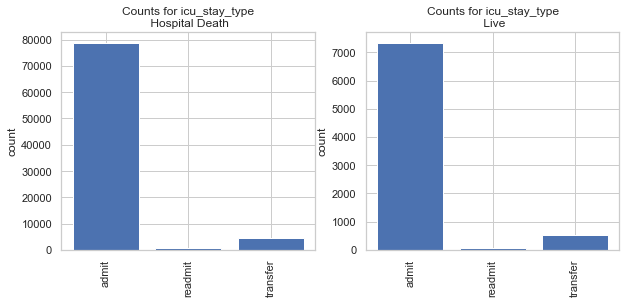

gender


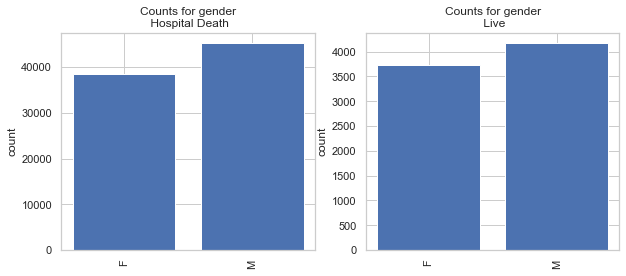

In [31]:
cat_cols = ['icu_stay_type', 'gender']

train['dummy'] = np.ones(shape = train.shape[0])
for col in cat_cols:
    print(col)
    counts = train[['dummy', 'hospital_death', col]].groupby(['hospital_death', col], as_index = False).count()
    temp = counts[counts['hospital_death'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['hospital_death'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Hospital Death')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['hospital_death'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Live')
    plt.ylabel('count')
    plt.show()